In [3]:
import joblib
import numpy as np
import pandas as pd
from flask import Flask, request, jsonify, render_template
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support, precision_score, recall_score, roc_curve, auc, f1_score, roc_auc_score, log_loss
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("heart.csv") 
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
print("Shape of Dataset:", data.shape, '\n')
data.info()

Shape of Dataset: (303, 14) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [6]:
data.duplicated().sum()

1

In [7]:
data.drop_duplicates(inplace=True)
data.shape

(302, 14)

In [8]:
unique_number = []
for i in data.columns:
    x = data[i].value_counts().count()
    unique_number.append(x)
pd.DataFrame(unique_number, index=data.columns, columns=["Total de Unique Values"])

,Total de Unique Values
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


In [9]:
numeric_var = ["age", "trtbps", "chol", "thalachh", "oldpeak"]
categorical_var = ["sex", "cp", "fbs", "rest_ecg", "exang", "slope", "ca", "thal", "target"]

data[numeric_var].describe()

,age,trtbps,chol,thalachh,oldpeak
count,302.00000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046
std,9.04797,17.563394,51.753489,22.903527,1.161452
min,29.00000,94.000000,126.000000,71.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000
75%,61.00000,140.000000,274.750000,166.000000,1.600000
max,77.00000,200.000000,564.000000,202.000000,6.200000


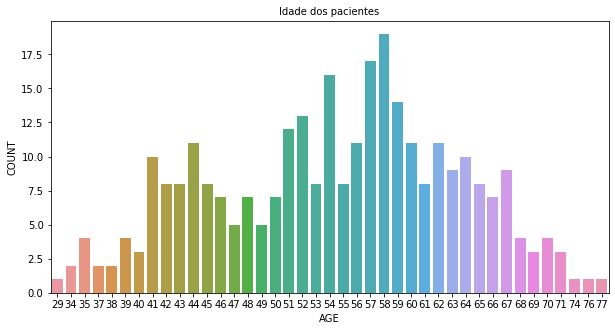

In [10]:
plt.figure(figsize=(10, 5))
sns.countplot(x=data["age"])
plt.title("Idade dos pacientes", fontsize=10)
plt.xlabel("AGE", fontsize=10)
plt.ylabel("COUNT", fontsize=10)
plt.show()

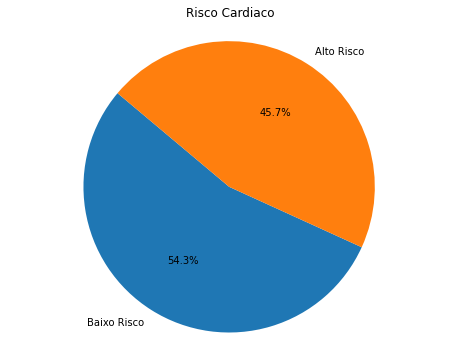

In [11]:
hight_risk_count = data['output'].sum()
non_hight_risk_count = len(data) - hight_risk_count

labels = ['Baixo Risco', 'Alto Risco']

sizes = [hight_risk_count, non_hight_risk_count]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Risco Cardiaco')
plt.axis('equal')
plt.show()

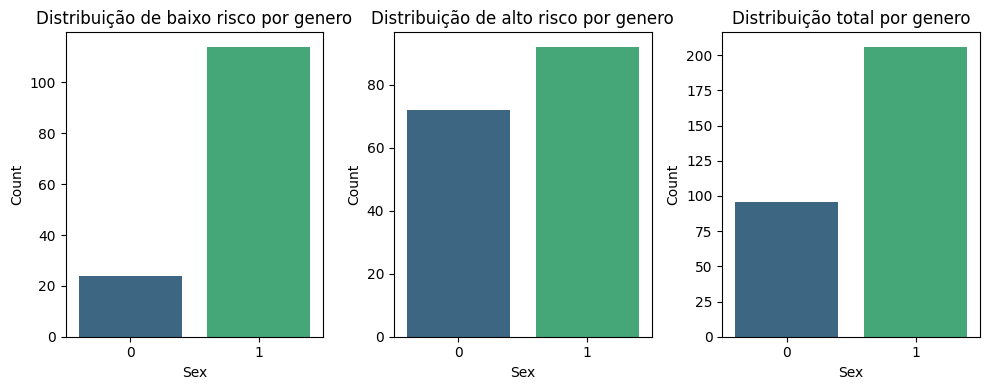

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(10, 4), dpi=100)

sex_low_risk = data.query('output == 0')['sex']
occurrences_low_risk = sex_low_risk.value_counts()
sns.barplot(ax=axes[0], x=occurrences_low_risk.index, y=occurrences_low_risk.values, palette=sns.color_palette("viridis", len(occurrences_low_risk)))
axes[0].set_title("Distribuição de baixo risco por genero")
axes[0].set_xlabel("Sex")
axes[0].set_ylabel("Count")

sex_high_risk = data.query('output == 1')['sex']
occurrences_high_risk = sex_high_risk.value_counts()
sns.barplot(ax=axes[1], x=occurrences_high_risk.index, y=occurrences_high_risk.values, palette=sns.color_palette("viridis", len(occurrences_high_risk)))
axes[1].set_title("Distribuição de alto risco por genero")
axes[1].set_xlabel("Sex")
axes[1].set_ylabel("Count")

sex_total = data['sex']
occurrences_total = sex_total.value_counts()
sns.barplot(ax=axes[2], x=occurrences_total.index, y=occurrences_total.values, palette=sns.color_palette("viridis", len(occurrences_total)))
axes[2].set_title("Distribuição total por genero")
axes[2].set_xlabel("Sex")
axes[2].set_ylabel("Count")

plt.tight_layout()

plt.show()

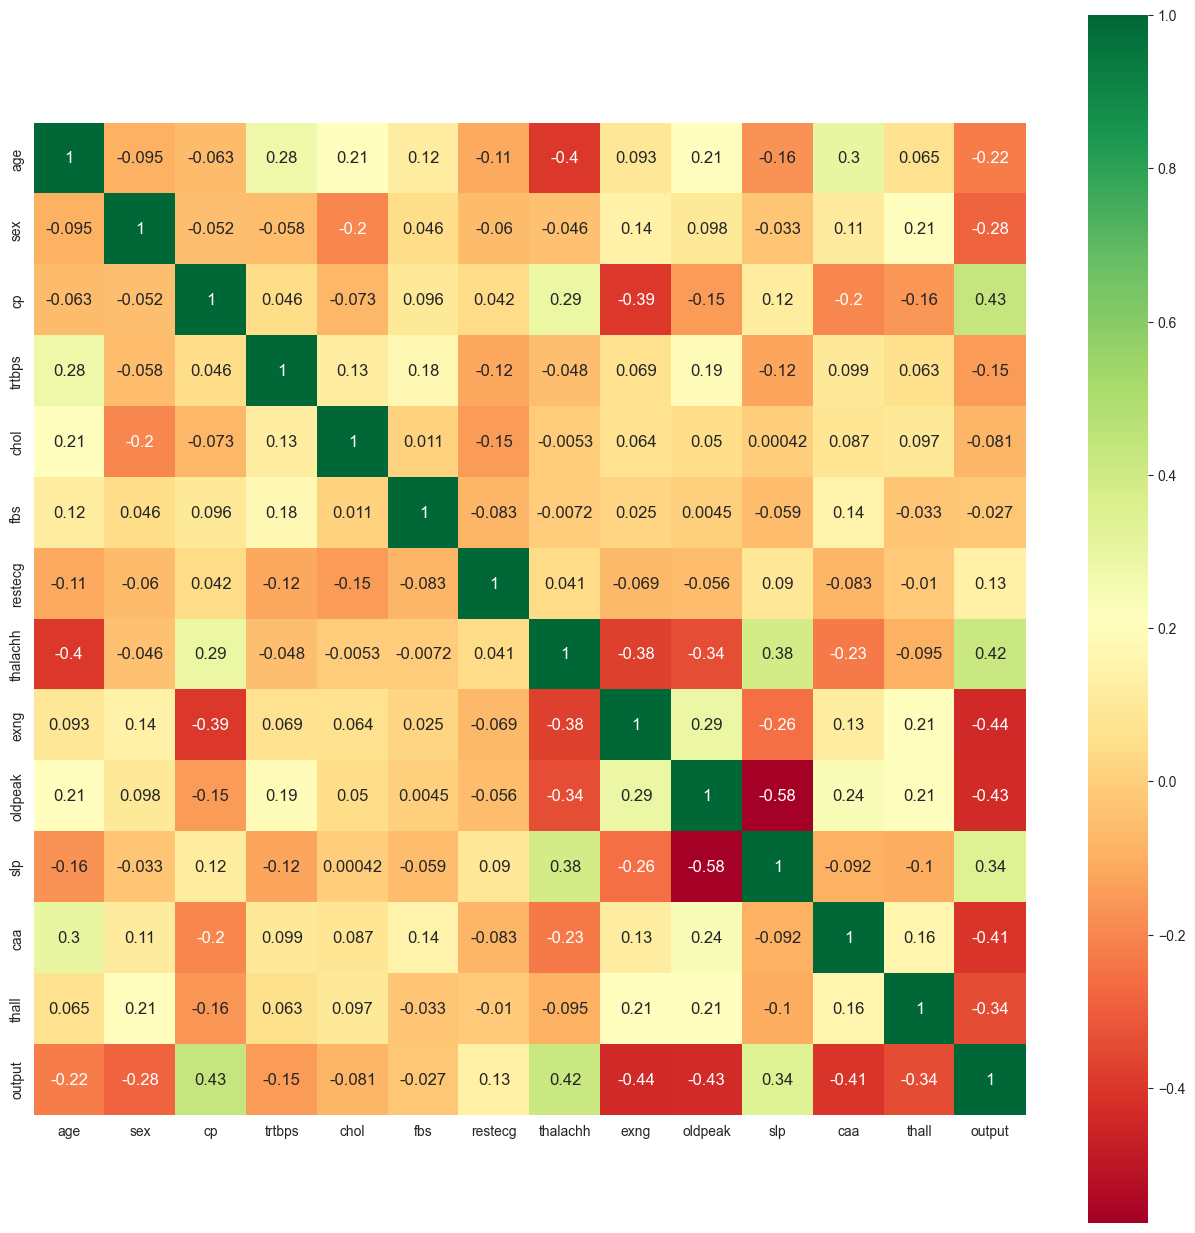

In [13]:
def print_correlation_matrix(data):
    plt.figure(figsize=(16, 16), dpi=100)
    sns.set_style("whitegrid")

    hm = sns.heatmap(data.corr(),
                    cmap="RdYlGn",
                    cbar=True,
                    square=True,
                    yticklabels=data.columns,
                    xticklabels=data.columns,
                    annot=True,
                    annot_kws={'size':12},
                    )

    plt.show()

print_correlation_matrix(data)
# CP, THALACHH E SLP TÊM UMA FORTE RELAÇÃO COM CASOS DE ATAQUE CARDIACO

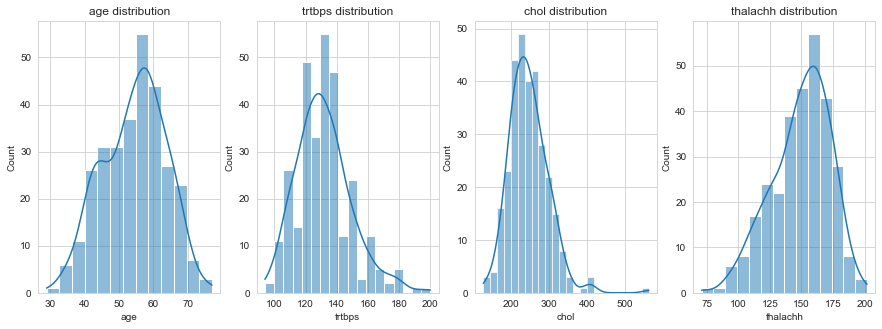

In [14]:
plt.figure(figsize=(15, 5))
for i, feature in enumerate(['age', 'trtbps', 'chol', 'thalachh']):
    plt.subplot(1, 4, i+1)
    sns.histplot(data[feature], kde=True)
    plt.title(f'{feature} distribution')

# Distribuição das pessoas por idade, pressão sanguinea, colestrol, e frequência cardíaca máxima 

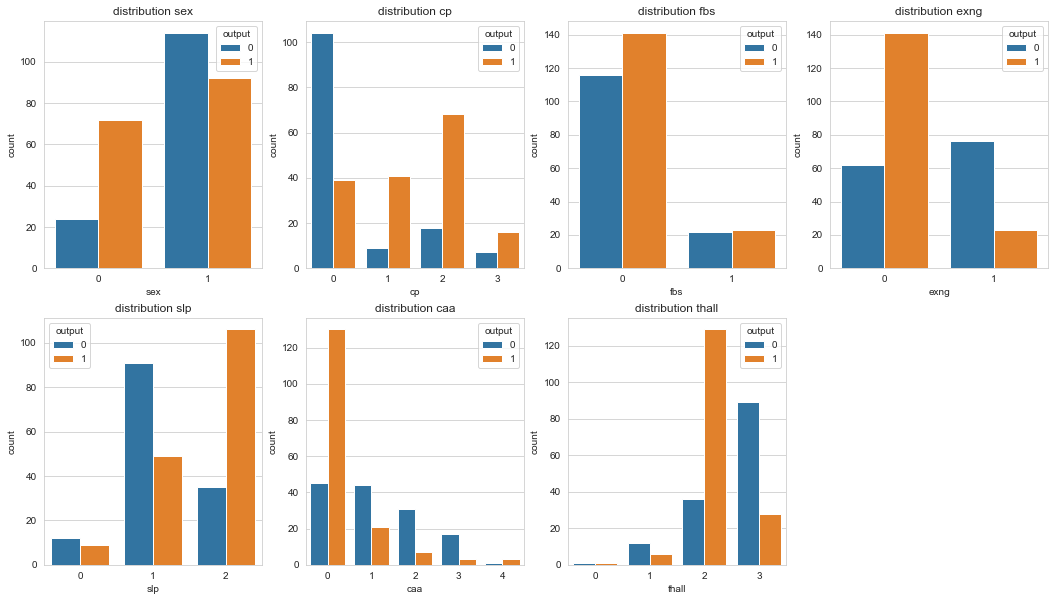

In [15]:
plt.figure(figsize=(18, 10))
for i, feature in enumerate(['sex', 'cp', 'fbs', 'exng', 'slp', 'caa', 'thall']):
    plt.subplot(2, 4, i+1)
    sns.countplot(x=feature, data=data, hue='output')
    plt.title(f'distribution {feature}')
    
# Distribuição por cada tipo e nivel da doença

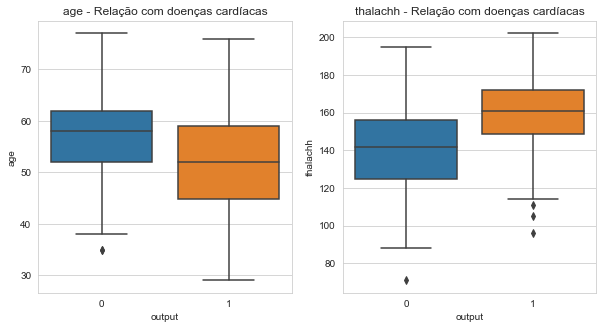

In [16]:
plt.figure(figsize=(10, 5))
for i, feature in enumerate(['age', 'thalachh']):
    plt.subplot(1, 2, i+1)
    sns.boxplot(x='output', y=feature, data=data)
    plt.title(f'{feature} - Relação com doenças cardíacas')
    
# Pessoas com maior bpm tendem a ter doenças cardíacas
# Pessoas com mais novas tendem a ter doenças cardíacas

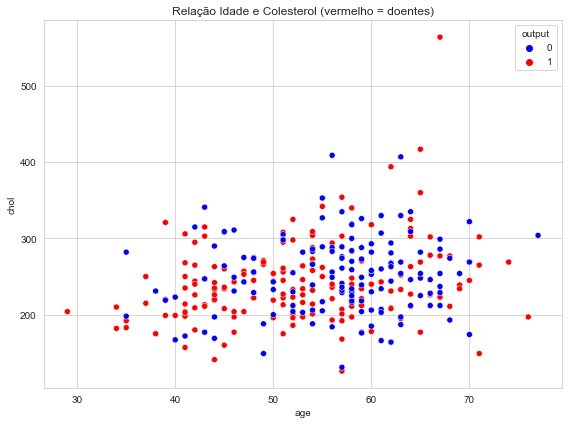

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='chol', data=data, hue='output', palette=['blue', 'red'])
plt.title('Relação Idade e Colesterol (vermelho = doentes)')
plt.tight_layout()
plt.show()

Accuracy: 0.8688524590163934
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.75      0.84        28
           1       0.82      0.97      0.89        33

    accuracy                           0.87        61
   macro avg       0.89      0.86      0.86        61
weighted avg       0.88      0.87      0.87        61



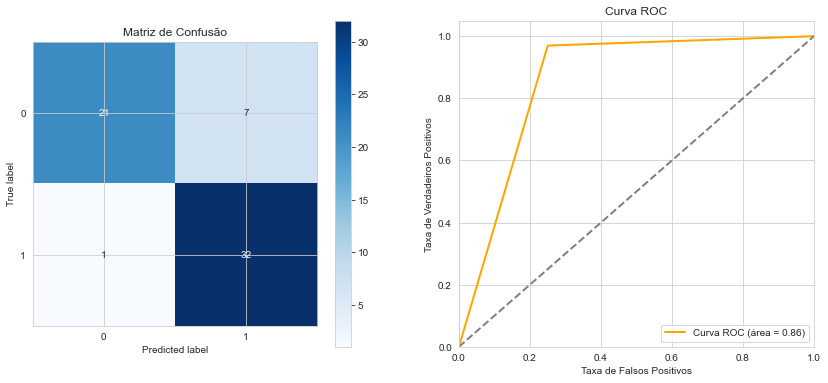

Probabilidade de ataque cardíaco: 0.32


['linear_regression_model.pkl']

In [27]:
#Logistic Regression
features = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'caa', 'thall', 'slp']
X = data[features]
y = data['output']

#Variaveis de categoria
X = pd.get_dummies(X, columns=['cp', 'restecg', 'thall'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(random_state=123)
model.fit(X_train_scaled, y_train)

#Predicts
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
disp.plot(cmap='Blues', ax=plt.gca())
plt.title('Matriz de Confusão')

plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='orange', lw=2, label='Curva ROC (área = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")

plt.show()

def predict_heart_attack(input_data):
    input_df = pd.DataFrame([input_data], columns=features)
    input_df = pd.get_dummies(input_df, columns=['cp', 'restecg', 'thall'], drop_first=True)
    input_df = input_df.reindex(columns=X_train.columns, fill_value=0)
    input_scaled = scaler.transform(input_df)
    probability = model.predict_proba(input_scaled)[:, 1]
    return probability[0]

input_data = {
    'age': 20,
    'sex': 1,
    'cp': 1,
    'trtbps': 130,
    'chol': 100,
    'fbs': 0,
    'restecg': 1,
    'thalachh': 120,
    'exng': 0,
    'caa': 0,
    'thall': 2,
    'slp' : 3
}

probability = predict_heart_attack(input_data)
print(f'Probabilidade de ataque cardíaco: {probability:.2f}')

joblib.dump(model, 'linear_regression_model.pkl')

Accuracy: 0.7704918032786885
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75        28
           1       0.79      0.79      0.79        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



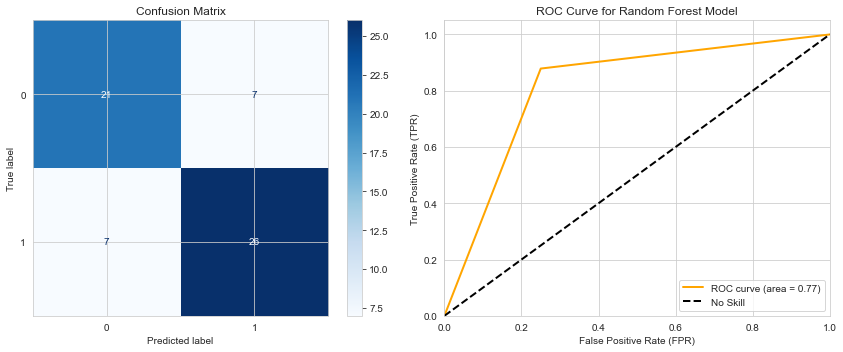

Probabilidade de ataque cardíaco: 0.44


['random_forest_classifier.pkl']

In [19]:
#Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestClassifier(random_state=123)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

roc_auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(12, 5))

# Plotar Matriz de Confusão
plt.subplot(1, 2, 1)
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.title("Confusion Matrix")

# Plotar Curva ROC
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Random Forest Model')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

def predict_heart_attack(input_data):
    input_df = pd.DataFrame([input_data], columns=features)
    input_df = pd.get_dummies(input_df, columns=['cp', 'restecg', 'thall'], drop_first=True)
    input_df = input_df.reindex(columns=X_train.columns, fill_value=0)
    input_scaled = scaler.transform(input_df)
    probability = model.predict_proba(input_scaled)[:, 1]
    return probability[0]

input_data = {
    'age': 60,
    'sex': 1,
    'cp': 3,
    'trtbps': 180,
    'chol': 40,
    'fbs': 0,
    'restecg': 1,
    'thalachh': 120,
    'exng': 0,
    'caa': 0,
    'thall': 2,
    'slp': 0,
}

probability = predict_heart_attack(input_data)
print(f'Probabilidade de ataque cardíaco: {probability:.2f}')

joblib.dump(model, 'random_forest_classifier.pkl')

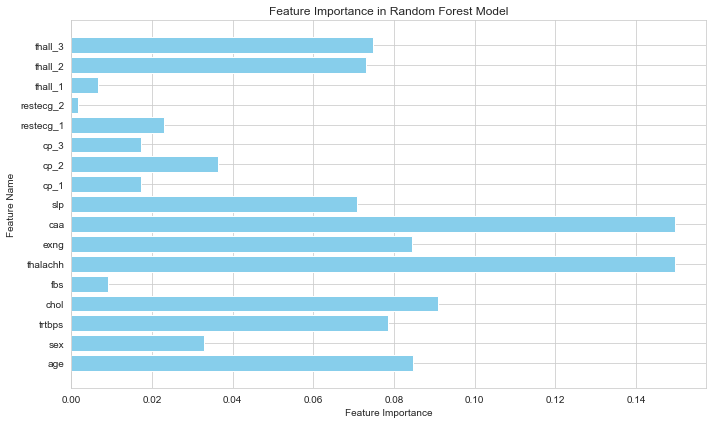

In [20]:
importances = model.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance in Random Forest Model")
plt.tight_layout()
plt.show()

Accuracy: 0.8360655737704918
Precision: 0.8285714285714286
Recall: 0.8787878787878788
F1-score: 0.8529411764705883
Log Loss: 0.45111659214493255


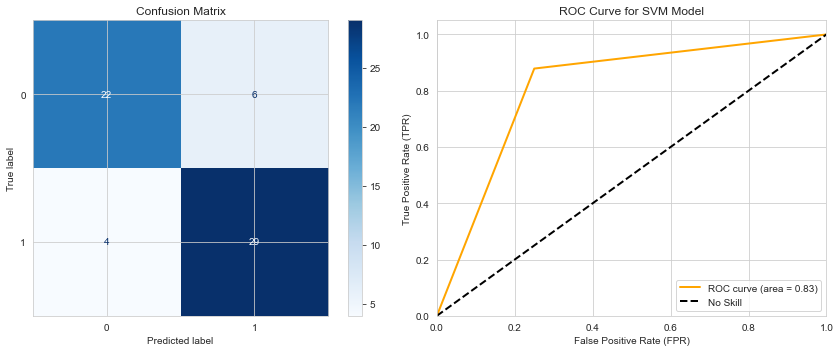

Probabilidade de ataque cardíaco: 0.43


['support_vector_machine.pkl']

In [21]:
#VECTOR

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVC(probability=True, random_state=123) 
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred_proba)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Log Loss:", logloss)

roc_auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.title("Confusion Matrix")

plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for SVM Model')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

def predict_heart_attack(input_data):
    input_df = pd.DataFrame([input_data], columns=features)
    input_df = pd.get_dummies(input_df, columns=['cp', 'restecg', 'thall'], drop_first=True)
    input_df = input_df.reindex(columns=X_train.columns, fill_value=0)
    input_scaled = scaler.transform(input_df)
    probability = model.predict_proba(input_scaled)[:, 1]
    return probability[0]

input_data = {
    'age': 20,
    'sex': 1,
    'cp': 1,
    'trtbps': 130,
    'chol': 150,
    'fbs': 0,
    'restecg': 1,
    'thalachh': 120,
    'exng': 0,
    'caa': 0,
    'thall': 2,
    'slp': 0
}

probability = predict_heart_attack(input_data)
print(f'Probabilidade de ataque cardíaco: {probability:.2f}')

joblib.dump(model, 'support_vector_machine.pkl')